<a href="https://colab.research.google.com/github/sanyog-chavhan/Intermediate-Statistics-with-Python/blob/main/Intermediate_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intermediate Statistics

The libraries we'll be using are:

pandas: For loading the dataset

math: For using certain mathematical functions like sqrt.

scipy.stats: For implementing Shapiro Wilks Test, Standard Error of the Mean, Confidence Interval, T-test and Chi-square test

In [32]:
import pandas as pd
import math as m
import scipy.stats as st

In [3]:
df = pd.read_csv("Wine-quality-challenge.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Normal Distribution aka Gaussian Distribution** is a common probability distribution that forms a **bell-shaped curve** when plotted. It's characterized by its **symmetry around the mean**, with most values clustering around the mean and fewer values farther away.

This is very essential in statistics as many real-world phenomena tend to follow this distribution making it fundamental in data analysis.

For example,

Imagine you're measuring the heights of a large group of people. If you were to plot the heights on a graph, you might find that most people have heights close to the average height, while very tall or very short individuals are less common. This clustering around the average height is a characteristic of the Normal Distribution.

The **68-95-99 rule**, is a guideline that applies to data that follows a Normal Distribution:

Approximately **68%** of the data falls within **one standard deviation (σ) of the mean (μ)**.

  This can be expressed as: **μ - σ ≤ x ≤ μ + σ**

Approximately **95%** falls within **two standard deviations from the mean**.

  This can be expressed as: **μ - 2σ ≤ x ≤ μ + 2σ**

About **99.7%** falls within **three standard deviations from the mean**.

  This can be expressed as: **μ - 3σ ≤ x ≤ μ + 3σ**

<Axes: ylabel='Density'>

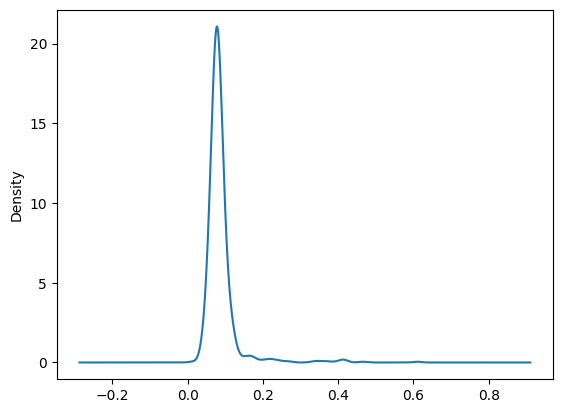

In [4]:
#Normal Distribution
df.chlorides.plot.density()   # Here we're analysing whether chlorides are normally distributed or not

In [5]:
#Using the 68-95-99 Rule for Normal Distribution, check whether the chlorides are normally distributed or not
df.loc[(df.chlorides <= df.chlorides.mean() + 1 * df.chlorides.std()) & (df.chlorides >= df.chlorides.mean() - 1 * df.chlorides.std())].chlorides.count()/df.chlorides.count() * 100

# It can be seen that almost 94.8% of the data falls within one standard deviation from the mean

94.80925578486554

In [6]:
#Using the 68-95-99 Rule for Normal Distribution, check whether the chlorides are normally distributed or not
df.loc[(df.chlorides <= df.chlorides.mean() + 2 * df.chlorides.std()) & (df.chlorides >= df.chlorides.mean() - 2 * df.chlorides.std())].chlorides.count()/df.chlorides.count() * 100

# It can be seen that almost 97.1% of the data falls within two standard deviations from the mean

97.18574108818011

In [7]:
#Using the 68-95-99 Rule for Normal Distribution, check whether the chlorides are normally distributed or not
df.loc[(df.chlorides <= df.chlorides.mean() + 3 * df.chlorides.std()) & (df.chlorides >= df.chlorides.mean() - 3 * df.chlorides.std())].chlorides.count()/df.chlorides.count() * 100

# It can be seen that almost 98% of the data falls within three standard deviations from the mean

98.06128830519074

In [8]:
# Share of Observations within 3 Standard Deviations of Alcohol
df.loc[(df.alcohol <= df.alcohol.mean() + 3 * df.alcohol.std()) & (df.alcohol >= df.alcohol.mean() - 3 * df.alcohol.std())].alcohol.count()/df.alcohol.count() * 100

99.49968730456536

<Axes: ylabel='Density'>

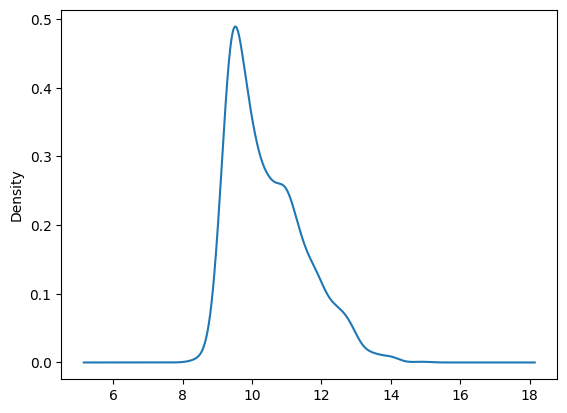

In [9]:
df.alcohol.plot.density()   # Alcohol does not follow the symmetric distribution with the mean in the middle

Before proceeding with Shapiro Wilks Test, let's talk about P-value and Hypothesis testing and terms like Null Hypothesis and Alternative Hypothesis and why P-value is essential during Shapiro Wilks Test

The **p-value** is a number that helps us decide whether the evidence we have supports a hypothesis or if it's just due to chance. A low p-value suggests strong evidence against the "nothing special" idea (null hypothesis), while a high p-value means the evidence isn't strong enough to reject that idea.

In Layman's terms, imagine you're in a courtroom trial. The p-value is like the evidence presented in court against a defendant (hypothesis). It tells you how strong the evidence is against your hypothesis. If the p-value is small, it suggests the evidence is strong, and you might consider the hypothesis not true.

**Null Hypothesis (H₀):** This is like assuming nothing unusual is happening. It's the default idea that there's no effect or difference. For example, in a trial, the null hypothesis might be "the defendant is innocent."

**Alternative Hypothesis (H₁ or Ha):** This is like suggesting something is different or interesting. It's the opposite of the null hypothesis. In the trial, the alternative hypothesis might be "the defendant is guilty."

A threshold value is required for decision making in such cases where we're presented with Null hypothesis and Alternative hypothesis. Think of a p-value threshold as your courtroom rule.

**For every hypothesis, there is an alternative hypothesis.**

For example,

**Null Hypothesis (H0)**: Average salary of a Cloud Engineer is $80k.

The alternative hypothesis for this will be,

**Alternative Hypothesis (H1)**: Average salary of a Cloud Engineer is not $80k.

Let's say the threshold is **0.05** in this case, so if the **P-value is small than the threshold**, we'd **reject the null hypothesis** in favour of the alternative hypothesis(**Average salary of a Cloud Engineer is not $80k**).

Else if the **P-value is bigger than the threshold**, we'd **accept the null hypothesis**(**Average salary of a Cloud Engineer is $80k**).

# Shapiro Wilks Test

**Shapiro Wilks Test** was created in 1965 in order to check the normality.

At its core, the Shapiro-Wilk test assesses the null hypothesis that your data follows a normal distribution. The test generates a **p-value**, which helps you make an informed decision about whether you can comfortably assume that your data comes from a normal distribution.

**Null Hypothesis (H₀)**: The null hypothesis assumes that your data follows a normal distribution.

**Alternative Hypothesis (H₁)**: The alternative hypothesis assumes that your data doesn't follow a normal distribution.

Let's consider the threshold as 0.05 in this case,

If **P-value < 0.05** = **Rejecting the Null Hypothesis** (The assumption that the data follows a normal distribution is rejected)

If **P-value > 0.05** = **Accepting the Null Hypothesis** (The assumption that the data follows a normal distribution is accepted)

In [10]:
#Shapiro Wilks Test for Normality
statistic, p = st.shapiro(df.chlorides)
p

0.0

In [11]:
if p > 0.05:
  print('Sample looks Gaussian/Normal (Failed to reject Null Hypothesis)')
elif p < 0.05:
  print('Sample does not look Gaussian/Normal (Rejecting the Null Hypothesis)')

Sample does not look Gaussian/Normal (Rejecting the Null Hypothesis)


In [12]:
#Shapiro Wilks Test for checking the Normality of Sulphates
statistic, p_sulphate = st.shapiro(df.sulphates)
print(p_sulphate)
if p_sulphate > 0.05:
  print('Sample looks Gaussian/Normal (Failed to reject Null Hypothesis)')
elif p_sulphate < 0.05:
  print('Sample does not look Gaussian/Normal (Rejecting the Null Hypothesis)')

5.821617678881608e-38
Sample does not look Gaussian/Normal (Rejecting the Null Hypothesis)


# Standard Error of the Mean

**Standard Error of the Mean (SEM)** is like a measure of how much your sample mean might wiggle around from the true population mean. **It gives you an idea of how reliable your sample mean is as an estimate of the actual average**.

In simple terms, **SEM tells you how much you can trust your calculated average from your sample to represent the whole group**.

Let's say you're a scientist studying the heights of sunflowers in a field. You measure the heights of 20 sunflowers and find the average height to be 120 cm.

But wait! Your sample of 20 sunflowers might not represent all the sunflowers in the field perfectly. Some sunflowers might be taller, some might be shorter, and your sample could be a bit lucky or unlucky in terms of heights.

This is where SEM comes in. Let's say you calculate the **SEM to be 5 cm**. It means that you can be reasonably confident that the true average height of all the sunflowers in the field is likely to fall within **115 cm to 125 cm (120 ± 5)**.

SEM = $\frac{Sample Size}{\sqrt{Sample Standard Deviation}}$.

In [13]:
#Standard Error of the Mean
st.sem(df.alcohol)

0.026650018979018173

In [14]:
#Traditional Method to calculate the Standard Error : Standard Deviation / Sqrt of the Observations
df.alcohol.std()/m.sqrt(df.alcohol.count())

0.026650018979018173

In [15]:
#Standard Error of pH
st.sem(df.pH)

0.0038608683325203784

In [16]:
df.pH.std()/m.sqrt(df.pH.count())

0.0038608683325203784

# Confidence Interval

Let's talk about **Confidence Interval** and **Confidence Level** and why they are necessary while estimation of different parameters.

In statistics, a confidence interval is a range of values around an estimated parameter that you're reasonably confident contains the true parameter value.

Mathematically, a confidence interval is typically represented as:

**Estimate ± Margin of Error**

Where:

**Estimate** is the calculated value based on your data, such as the sample mean or proportion.

**Margin of Error** accounts for the variability in your data and is determined by the chosen confidence level and the variability of the data.

The confidence level (**often denoted as 1 - α**) indicates the probability that your confidence interval contains the true parameter value.

For instance, **a 95% confidence level means you're 95% confident that the true parameter value lies within your interval**.

In [17]:
#Confidence Interval of the mean of Citric Acid and considering 95% Confidence Level
print(df[["citric acid"]].mean())
st.norm.interval(confidence = 0.95,
                 loc = df[["citric acid"]].mean(),
                 scale = st.sem(df[["citric acid"]]))

citric acid    0.270976
dtype: float64


(array([0.26142755]), array([0.28052367]))

In [18]:
#With 90% confidence Level
st.norm.interval(confidence = 0.90,
                 loc = df[["citric acid"]].mean(),
                 scale = st.sem(df[["citric acid"]]))

(array([0.26296262]), array([0.2789886]))

In [19]:
#Confidence Interval of the Density Mean
print(df.density.mean())
st.norm.interval(confidence = 0.95,
                 loc = df.density.mean(),
                 scale = st.sem(df.density))

0.9967466791744841


(0.9966541725972521, 0.9968391857517162)

<Axes: >

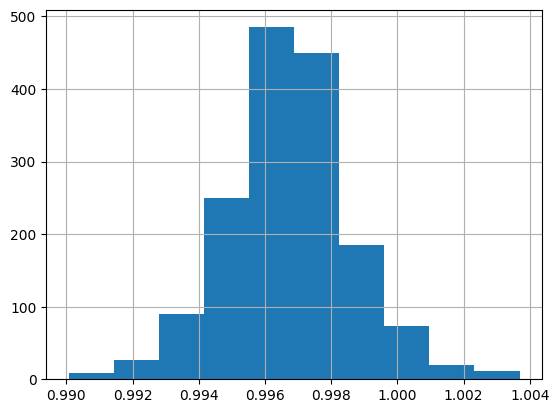

In [20]:
df.density.hist()

# T-test

The t-test calculates a **t-value based on the means and variability of your two groups**. Then, it compares this t-value to a critical t-value, which is like a benchmark for significance. If your calculated t-value is much bigger than the critical value, it suggests the differences are meaningful.

In layman's terms, **a t-test is like a detective tool for comparing two groups and figuring out if they're really different or if the differences could just be due to random chance**.

**T-test helps one understand whether one group is statistically different from the other**.

In the below example, we'll import the stackoverflow dataset and compare the salaries of people working in the UK vs Germany and check whether one group is statistically different from the other or not.

In [21]:
#Load data for T-test
data = pd.read_csv("stackoverflow.csv")
data.head()

,Country,Salary,YearsCodedJob,OpenSource,Hobby,CompanySizeNumber,Remote,CareerSatisfaction,Data_scientist,Database_administrator,...,Developer_with_stats_math_background,DevOps,Embedded_developer,Graphic_designer,Graphics_programming,Machine_learning_specialist,Mobile_developer,Quality_assurance_engineer,Systems_administrator,Web_developer
0,United Kingdom,100000.000000,20,0,1,5000,Remote,8,0,0,...,0,0,1,0,0,0,0,0,0,0
1,United States,130000.000000,20,1,1,1000,Remote,9,0,0,...,0,1,1,0,0,0,0,1,0,1
2,United States,175000.000000,16,0,1,10000,Not remote,7,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Germany,64516.129030,4,0,0,1000,Not remote,9,0,0,...,0,0,0,0,0,0,0,0,0,1
4,India,6636.323594,1,0,1,5000,Not remote,5,0,0,...,0,0,0,0,0,0,0,0,0,1


In [22]:
#Compare salaries of People working in UK vs Germany
#Creating subsets of salaries
salary_uk = data.loc[data.Country == 'United Kingdom'].Salary
salary_germany = data.loc[data.Country == 'Germany'].Salary

In [23]:
#T-test
sta, p_value = st.ttest_ind(a = salary_uk, b = salary_germany)
print(p_value)
if p_value > 0.05:
  print('Fail to reject null hypothesis : Both countries have similar salaries')
else:
  print('Reject null hypothesis : Both countries have statistically different salaries')

0.026389999555203502
Reject null hypothesis : Both countries have statistically different salaries


<Axes: ylabel='Density'>

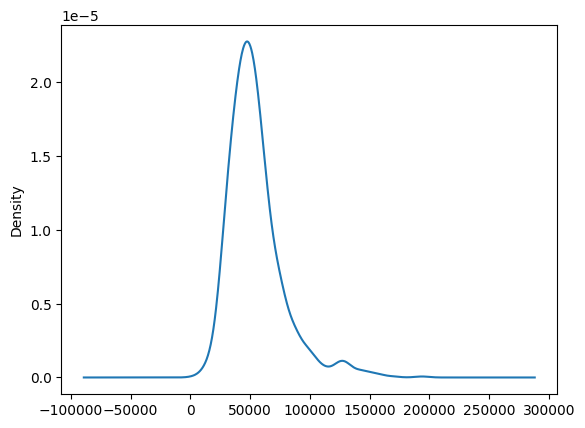

In [24]:
salary_uk.plot.density()

<Axes: ylabel='Density'>

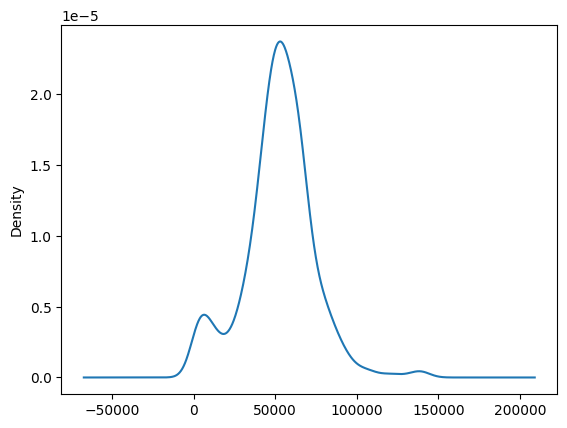

In [25]:
salary_germany.plot.density()

In [26]:
#Compare years of exp of People working in India vs United States
#Creating subsets of Years of exp
yexp_india = data.loc[data.Country == 'India'].YearsCodedJob
yexp_us = data.loc[data.Country == 'United States'].YearsCodedJob

In [27]:
#T-test
sta1, p_value1 = st.ttest_ind(a = yexp_india, b = yexp_us)
print(p_value1)
if p_value > 0.05:
  print('Fail to reject null hypothesis : Both countries have similar years of exp')
else:
  print('Reject null hypothesis : Both countries have statistically different years of exp')

5.225676347614714e-58
Reject null hypothesis : Both countries have statistically different years of exp


<Axes: ylabel='Density'>

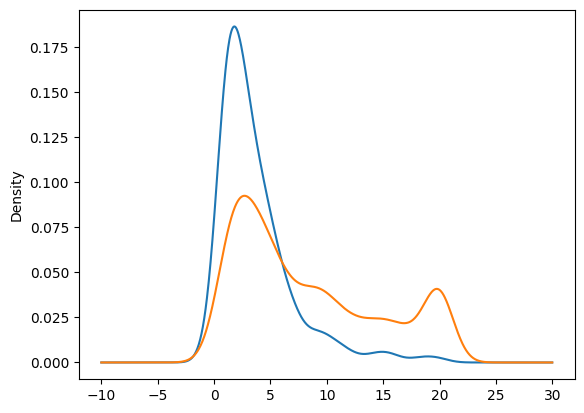

In [28]:
yexp_india.plot.density()
yexp_us.plot.density()

# Chi-Square Test

The chi-square test calculates a **chi-square statistic based on the differences between your observed and expected counts** in a contingency table. Then, it compares this statistic to a critical chi-square value to determine **if the differences are significant**.

In Layman's terms, imagine you're curious if there's a connection between two categorical variables, like the color of cars and their popularity. The chi-square test is like a detective tool that helps you figure out if these variables are related or if any relationship you see could just be due to chance.

In the below example, we're implementing the Chi-square test in order to identify the relationship between countries and remote preferences.

In [29]:
#Chi-Square Test to check relationship between countries and remote preferences
tab = pd.crosstab(index = data.Country,columns=data.Remote)
tab

Remote,Not remote,Remote
Country,,
Canada,457,28
Germany,717,40
India,482,56
United Kingdom,953,70
United States,2410,381


In [30]:
st.chi2_contingency(tab).pvalue

3.321120877301216e-16

In [31]:
if st.chi2_contingency(tab).pvalue > 0.05:
  print('No relationship (Failed to reject Null Hypothesis)')
else:
  print('There is a relationship (Reject Null Hypothesis)')

There is a relationship (Reject Null Hypothesis)
